In [1]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Part_ A Salarydata_test

In [7]:
df = pd.read_csv(r"C:\Users\acer\Desktop\excelr\assignments\Suppoort Vector Machines\SalaryData_Test(1).csv.crdownload")
df.shape

(1136, 14)

In [8]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,41,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K
1132,43,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,1977.0,50.0,United-States,>50K
1133,29,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,56.0,United-States,<=50K
1134,53,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1136 non-null   int64  
 1   workclass      1136 non-null   object 
 2   education      1136 non-null   object 
 3   educationno    1136 non-null   int64  
 4   maritalstatus  1136 non-null   object 
 5   occupation     1136 non-null   object 
 6   relationship   1136 non-null   object 
 7   race           1136 non-null   object 
 8   sex            1136 non-null   object 
 9   capitalgain    1135 non-null   float64
 10  capitalloss    1135 non-null   float64
 11  hoursperweek   1135 non-null   float64
 12  native         1135 non-null   object 
 13  Salary         1135 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 124.4+ KB


In [10]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [11]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,1136.000000,1136.000000,1135.000000,1135.000000,1135.000000
mean,38.375000,10.055458,1681.728634,91.201762,41.326872
std,13.131536,2.660447,10125.759966,410.491376,11.792508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'educationno'),
  Text(2, 0, 'capitalgain'),
  Text(3, 0, 'capitalloss'),
  Text(4, 0, 'hoursperweek')])

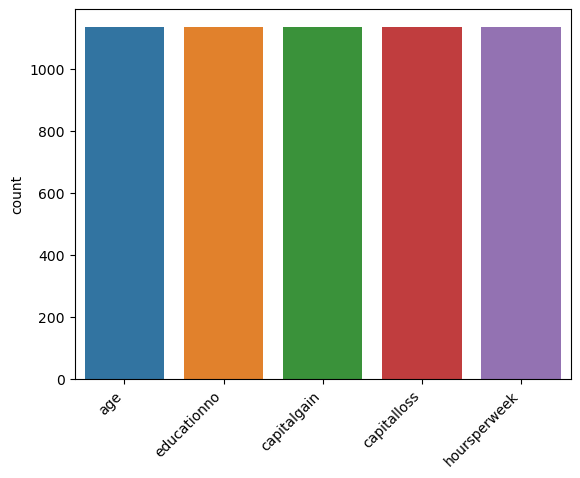

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,)
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='educationno', ylabel='age'>

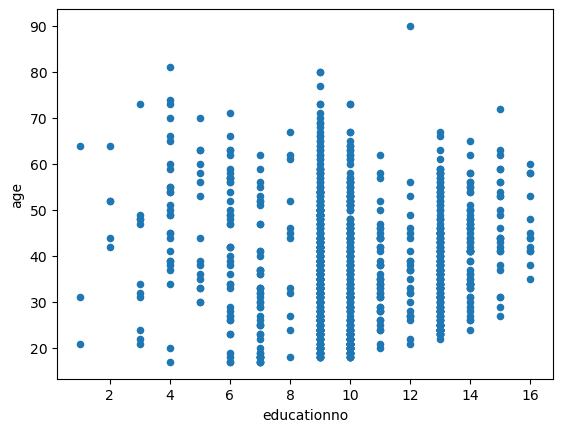

In [13]:
df.plot(kind = 'scatter',x = 'educationno',y = 'age')

<Axes: >

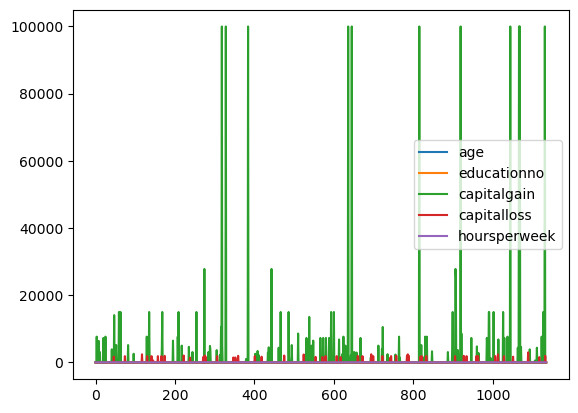

In [14]:
df.plot(kind = 'line')

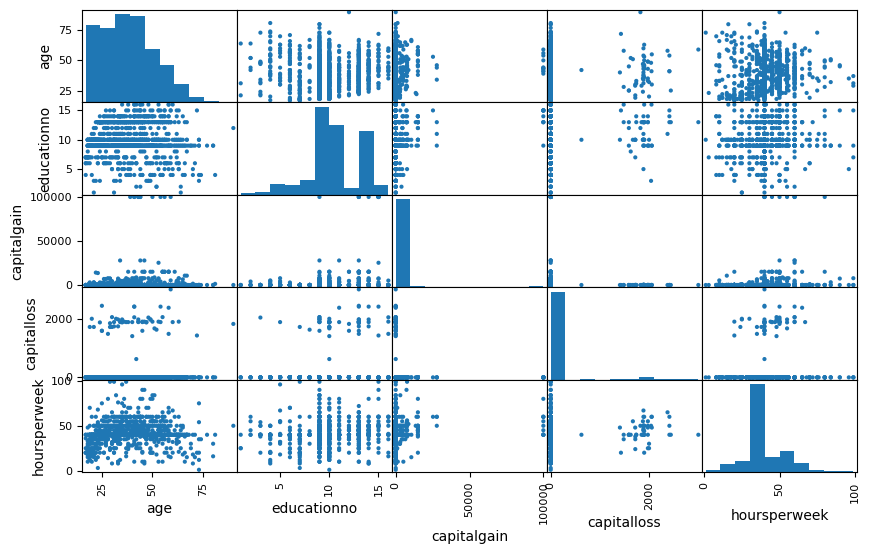

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
X = df.drop('Salary', axis=1)
y = df['Salary']

# This Converts categorical variables to numerical so we use Label Encoding package.
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2)

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

ValueError: Input contains NaN

In [19]:
len(X_train),len(X_test),len(y_train),len(y_test)

(908, 228, 908, 228)

# Part B Salarydata_data

In [22]:
df1 = pd.read_csv(r"C:\Users\acer\Desktop\excelr\assignments\Suppoort Vector Machines\SalaryData_Train(1).csv.crdownload")
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,54,State-gov,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0.0,0.0,38.0,United-States,<=50K
3666,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,1628.0,40.0,United-States,<=50K
3667,37,Private,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K
3668,28,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,30.0,United-States,<=50K


In [23]:
df1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3670 non-null   int64  
 1   workclass      3670 non-null   object 
 2   education      3670 non-null   object 
 3   educationno    3670 non-null   int64  
 4   maritalstatus  3670 non-null   object 
 5   occupation     3669 non-null   object 
 6   relationship   3669 non-null   object 
 7   race           3669 non-null   object 
 8   sex            3669 non-null   object 
 9   capitalgain    3669 non-null   float64
 10  capitalloss    3669 non-null   float64
 11  hoursperweek   3669 non-null   float64
 12  native         3669 non-null   object 
 13  Salary         3669 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 401.5+ KB


In [25]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [26]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,3670.000000,3670.000000,3669.000000,3669.000000,3669.000000
mean,38.807629,10.137057,1046.640501,98.834560,41.195421
std,13.081898,2.538666,7178.161972,423.412019,11.478951
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2547.000000,99.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'educationno'),
  Text(2, 0, 'capitalgain'),
  Text(3, 0, 'capitalloss'),
  Text(4, 0, 'hoursperweek')])

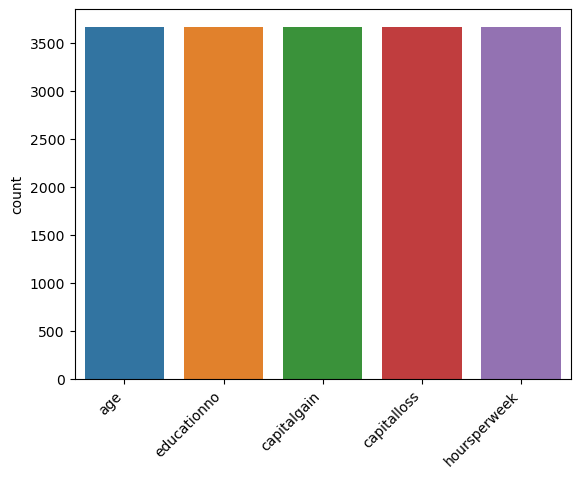

In [27]:
sns.countplot(data=df1,)
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='capitalgain', ylabel='age'>

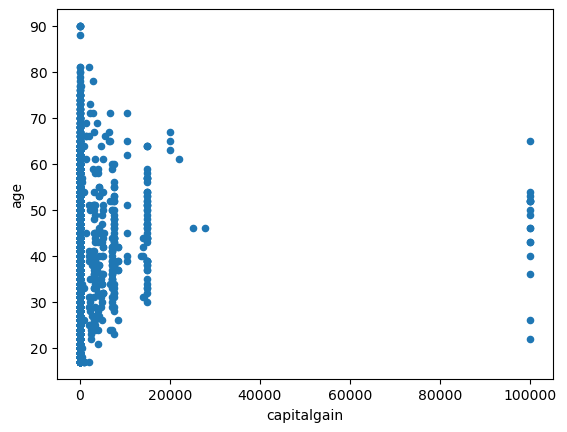

In [28]:
df1.plot(kind = 'scatter',x = 'capitalgain',y = 'age')

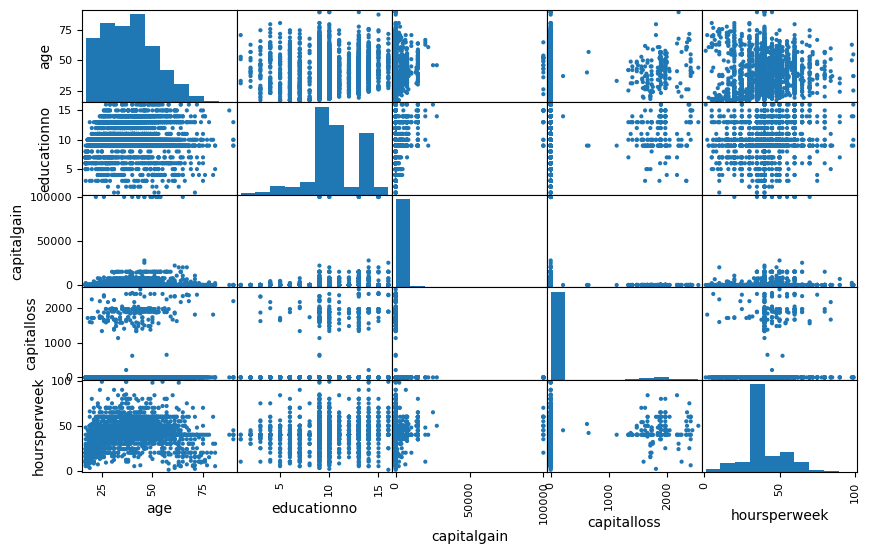

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=1,figsize=(10,6));

<Axes: xlabel='hoursperweek'>

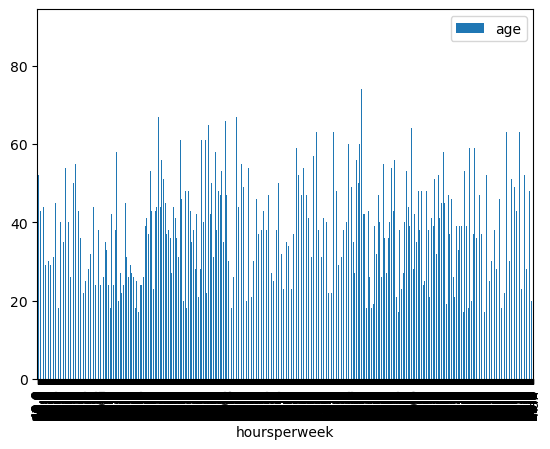

In [30]:
df1.plot(kind = 'bar',x = 'hoursperweek',y = 'age')

In [31]:
X = df1.drop('Salary', axis=1)
y = df1['Salary']

# This Converts categorical variables to numerical.
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2)

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

ValueError: Input contains NaN

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

# Q2 Forest fire

In [33]:
df2 = pd.read_csv(r"C:\Users\acer\Desktop\excelr\assignments\Suppoort Vector Machines\forestfires.csv")
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [34]:
df2.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [36]:
df2.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [37]:
df2.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'FFMC'),
  Text(1, 0, 'DMC'),
  Text(2, 0, 'DC'),
  Text(3, 0, 'ISI'),
  Text(4, 0, 'temp'),
  Text(5, 0, 'RH'),
  Text(6, 0, 'wind'),
  Text(7, 0, 'rain'),
  Text(8, 0, 'area'),
  Text(9, 0, 'dayfri'),
  Text(10, 0, 'daymon'),
  Text(11, 0, 'daysat'),
  Text(12, 0, 'daysun'),
  Text(13, 0, 'daythu'),
  Text(14, 0, 'daytue'),
  Text(15, 0, 'daywed'),
  Text(16, 0, 'monthapr'),
  Text(17, 0, 'monthaug'),
  Text(18, 0, 'monthdec'),
  Text(19, 0, 'monthfeb'),
  Text(20, 0, 'monthjan'),
  Text(21, 0, 'monthjul'),
  Text(22, 0, 'monthjun'),
  Text(23, 0, 'monthmar'),
  Text(24, 0, 'monthmay'),
  Text(25, 0, 'monthnov'),
  Text(26, 0, 'monthoct'),
  Text(27, 0, 'monthsep')])

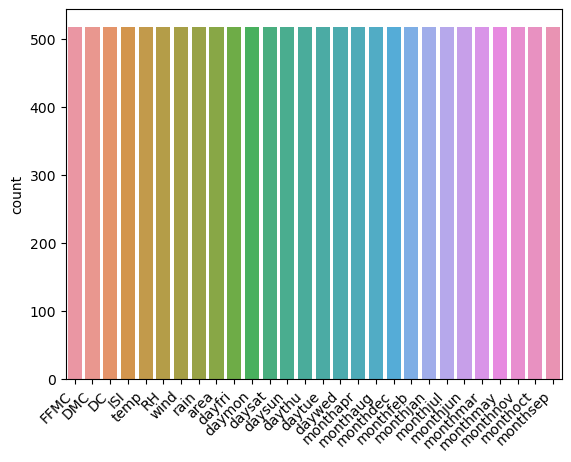

In [38]:
sns.countplot(data=df2,)
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='RH'>

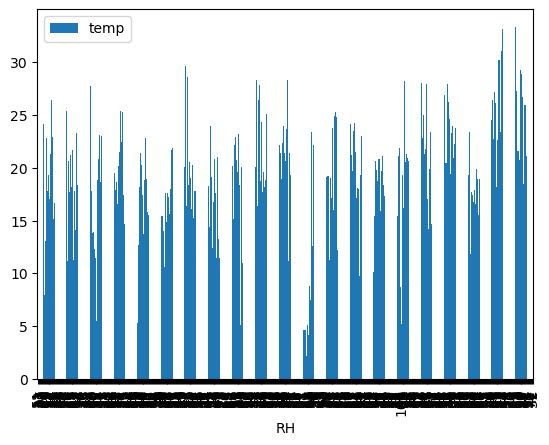

In [39]:
df2.plot(kind = 'bar',y = 'temp',x = 'RH')

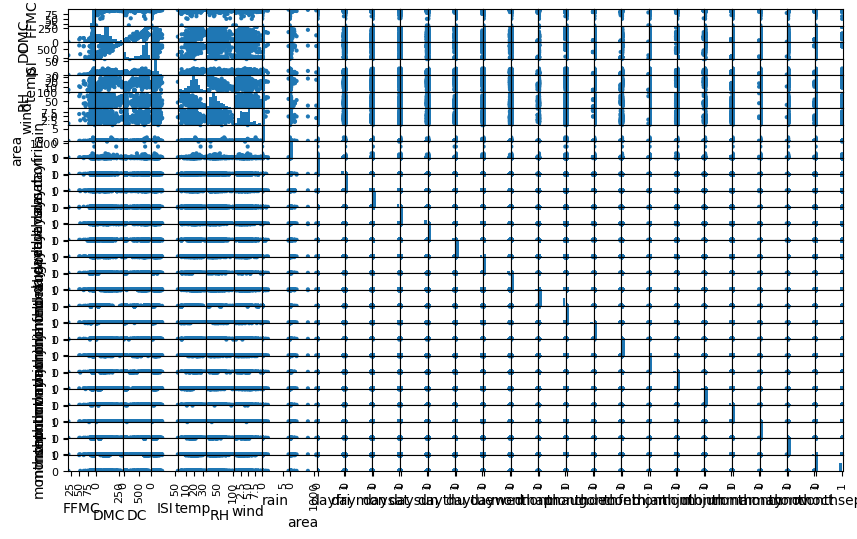

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2, alpha=1,figsize=(10,6));

<Axes: >

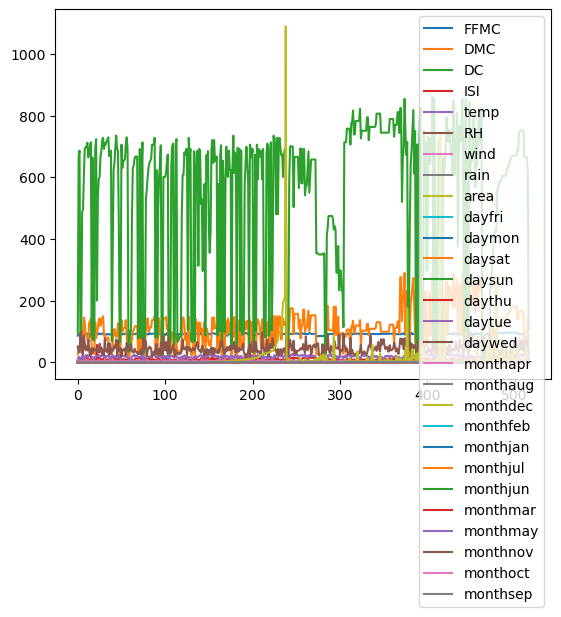

In [41]:
df2.plot(kind = 'line')

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df2.drop('size_category',axis = 1)
y = df2['size_category']

In [43]:
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size = 0.2,random_state =2)

svm_model = SVC(kernel = 'rbf', C=1.0)
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
classification_report = classification_report(y_test,y_pred)

print(f'accuracy:{accuracy:.2f}')
print('confusion matrix:',confusion_matrix)
print('classification report',classification_report)

accuracy:1.00
confusion matrix: [[23  0]
 [ 0 81]]
classification report               precision    recall  f1-score   support

       large       1.00      1.00      1.00        23
       small       1.00      1.00      1.00        81

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [44]:
len(X_train),len(X_test),len(y_train),len(y_test)

(413, 104, 413, 104)